**Get Data** - Our data set will consist of an Excel file containing MLI project hours per date. We will learn how to read in the excel file for processing.

**Prepare Data** - The data is an irregular time series having duplicate dates. We will be challenged in compressing the data and coming up with next years forecasted MLI hours.

**Analyze Data** - We use graphs to visualize trends and spot outliers. Some built in computational tools will be used to calculate next years forecasted MLI hours.

**Present Data** - The results will be plotted.

***NOTE: Make sure you have looked through all previous lessons, as the knowledge learned in previous lessons will be needed for this exercise.***

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib

%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Pandas version: ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.2 |Anaconda, Inc.| (default, Sep 19 2017, 08:03:39) [MSC v.1900 64 bit (AMD64)]
Pandas version: 0.20.3
Matplotlib version 2.0.2


We will be creating our own test data for analysis.

In [3]:
# set seed
np.seed(111)

# Function to generate test data
def CreateDataSet(Number=1):
    
    Output = []
    
    for i in range(Number):
        
        # Create a weekly (mondays) date range
        rng = pd.date_range(start='1/1/2012', end='12/31/2016', freq='W-MON')
        
        # Create random data
        data = np.randint(low=25,high=1000,size=len(rng))
        
        # Status pool
        status = [1,2,3]
        
        # Make a random list of statuses
        random_status = [status[np.randint(low=0,high=len(status))] for i in range(len(rng))]
        
        # State pool
        MLIs = ['0026','A010','a010','A210','0010','A210001']
        
        # Make a random list of states 
        random_MLIs = [MLIs[np.randint(low=0,high=len(MLIs))] for i in range(len(rng))]
    
        Output.extend(zip(random_MLIs, random_status, data, rng))
        
    return Output

Now that we have a function to generate our test data, lets create some data and stick it into a dataframe.

In [4]:
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset, columns=['MLIs','Status','EffortHours','StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 4 columns):
MLIs           1044 non-null object
Status         1044 non-null int64
EffortHours    1044 non-null int64
StatusDate     1044 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 32.7+ KB


In [5]:
df.head()

,MLIs,Status,EffortHours,StatusDate
0,a010,2,877,2012-01-02
1,A210,2,901,2012-01-09
2,A010,3,749,2012-01-16
3,A210001,3,111,2012-01-23
4,0026,3,300,2012-01-30


We are now going to save this dataframe into an Excel file, to then bring it back to a dataframe. We simply do this to show you how to read and write to Excel files.

We do not write the index values of the dataframe to the Excel file, since they are not meant to be part of our initial test data set.

In [6]:
# Save results to excel
df.to_excel('Lesson3.xlsx', index=False)
print('Done')

Done


# Grab Data from Excel

We will be using the ***read_excel*** function to read in data from an Excel file. The function allows you to read in specfic tabs by name or location.

In [7]:
pd.read_excel?

**Note: The location on the Excel file will be in the same folder as the notebook, unless specified otherwise.**

In [8]:
# Location of file
Location = r'C:\Users\502689880\Learn Pandas\Lesson3.xlsx'

# Parse a specific sheet
df = pd.read_excel(Location, 0, index_col='StatusDate')
df.dtypes

MLIs           object
Status          int64
EffortHours     int64
dtype: object

In [9]:
df.index

DatetimeIndex(['2012-01-02', '2012-01-09', '2012-01-16', '2012-01-23',
               '2012-01-30', '2012-02-06', '2012-02-13', '2012-02-20',
               '2012-02-27', '2012-03-05',
               ...
               '2016-10-24', '2016-10-31', '2016-11-07', '2016-11-14',
               '2016-11-21', '2016-11-28', '2016-12-05', '2016-12-12',
               '2016-12-19', '2016-12-26'],
              dtype='datetime64[ns]', name='StatusDate', length=1044, freq=None)

In [10]:
df.head()

,MLIs,Status,EffortHours
StatusDate,,,
2012-01-02,a010,2,877
2012-01-09,A210,2,901
2012-01-16,A010,3,749
2012-01-23,A210001,3,111
2012-01-30,0026,3,300


# Prepare Data

This section attempts to clean up the data for analysis.

1. Make sure the MLI column is all in upper case
2. Only select records where the account status is equal to "1"
3. Merge (A210 and A210001) to A210 in the MLIs column
4. Remove any outliers (any odd results in the data set)

Lets take a quick look on how some of the *MLIs* values are upper case and some are lower case

In [11]:
df['MLIs'].unique()

array(['a010', 'A210', 'A010', 'A210001', '0026', '0010'], dtype=object)

To convert all the MLIs values to upper case we will use the ***upper()*** function and the dataframe's ***apply*** attribute. The ***lambda*** function simply will apply the upper function to each value in the *MLIs* column.

In [12]:
# Clean MLIs Column, convert to upper case
df['MLIs'] = df.MLIs.apply(lambda x: x.upper())

In [13]:
df['MLIs'].unique()

array(['A010', 'A210', 'A210001', '0026', '0010'], dtype=object)

In [14]:
# Only grab where Status == 1
mask = df['Status'] == 1
df = df[mask]

To turn the ***A210001*** MLIs to ***A210*** we simply...

***[df.MLIs == 'A210001']*** - Find all records in the *MLIs* column where they are equal to *A210001*.
***df.MLIs[df.MLIs == 'A210001'] = 'A210'*** - For all records in the *MLIs* column where they are equal to *A210001*, replace them with *A210*.

In [15]:
# Convert A210001 to A210
mask = df.MLIs == 'A210001'
df['MLIs'][mask] = 'A210'

Now we can see we have a much cleaner data set to work with.

In [16]:
df['MLIs'].unique()

array(['A210', '0026', 'A010', '0010'], dtype=object)

At this point we may want to graph the data to check for any outliers or inconsistencies in the data. We will be using the ***plot()*** attribute of the dataframe.

As you can see from the graph below it is not very conclusive and is probably a sign that we need to perform some more data preparation.

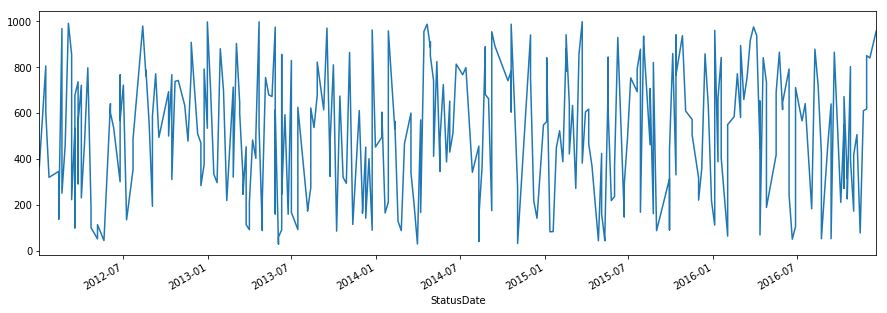

In [17]:
df['EffortHours'].plot(figsize=(15,5));

If we take a look at the data, we begin to realize that there are multiple values for the same MLIs, StatusDate, and Status combination. It is possible that this means the data you are working with is dirty/bad/inaccurate, but we will assume otherwise. We can assume this data set is a subset of a bigger data set and if we simply add the values in the ***EffortHours*** column per MLIs, StatusDate, and Status we will get the ***Total Effort Hours*** per day.

In [18]:
sortdf = df[df['MLIs']=='A210'].sort_index(axis=0)
sortdf.head(10)

,MLIs,Status,EffortHours
StatusDate,,,
2012-01-02,A210,1,368
2012-02-13,A210,1,347
2012-03-05,A210,1,992
2012-03-19,A210,1,678
2012-04-02,A210,1,722
2012-05-07,A210,1,115
2012-06-25,A210,1,302
2012-07-09,A210,1,136
2012-08-13,A210,1,980


Our task is now to create a new dataframe that compresses the data so we have daily effort hours per MLI and StatusDate. We can ignore the Status column since all the values in this column are of value *1*. To accomplish this we will use the dataframe's functions ***groupby*** and ***sum()***.

Note that we had to use **reset_index**. If we did not, we would not have been able to group by both the MLI and the StatusDate since the groupby function expects only columns as inputs. The **reset_index** function will bring the index ***StatusDate*** back to a column in the dataframe.

In [19]:
# Group by MLIs and StatusDate
Daily = df.reset_index().groupby(['MLIs','StatusDate']).sum()
Daily.head()

Status  EffortHours
MLIs StatusDate                     
0010 2012-02-13       1          138
     2012-02-27       1          461
     2012-03-12       1          224
     2012-03-26       1          562
     2012-04-23       1          187

The ***MLIs*** and ***StatusDate*** columns are automatically placed in the index of the ***Daily*** dataframe. You can think of the ***index*** as the primary key of a database table but without the constraint of having unique values. Columns in the index as you will see allow us to easily select, plot, and perform calculations on the data.

Below we delete the ***Status*** column since it is all equal to one and no longer necessary.

In [20]:
del Daily['Status']
Daily.head()

EffortHours
MLIs StatusDate             
0010 2012-02-13          138
     2012-02-27          461
     2012-03-12          224
     2012-03-26          562
     2012-04-23          187

In [21]:
# What is the index of the dataframe
Daily.index

MultiIndex(levels=[['0010', '0026', 'A010', 'A210'], [2012-01-02 00:00:00, 2012-01-16 00:00:00, 2012-01-23 00:00:00, 2012-02-13 00:00:00, 2012-02-20 00:00:00, 2012-02-27 00:00:00, 2012-03-05 00:00:00, 2012-03-12 00:00:00, 2012-03-19 00:00:00, 2012-03-26 00:00:00, 2012-04-02 00:00:00, 2012-04-09 00:00:00, 2012-04-16 00:00:00, 2012-04-23 00:00:00, 2012-05-07 00:00:00, 2012-05-21 00:00:00, 2012-06-04 00:00:00, 2012-06-11 00:00:00, 2012-06-25 00:00:00, 2012-07-02 00:00:00, 2012-07-09 00:00:00, 2012-07-23 00:00:00, 2012-08-13 00:00:00, 2012-08-20 00:00:00, 2012-08-27 00:00:00, 2012-09-03 00:00:00, 2012-09-10 00:00:00, 2012-09-17 00:00:00, 2012-10-08 00:00:00, 2012-10-15 00:00:00, 2012-10-22 00:00:00, 2012-10-29 00:00:00, 2012-11-12 00:00:00, 2012-11-19 00:00:00, 2012-11-26 00:00:00, 2012-12-10 00:00:00, 2012-12-17 00:00:00, 2012-12-24 00:00:00, 2012-12-31 00:00:00, 2013-01-07 00:00:00, 2013-01-14 00:00:00, 2013-01-21 00:00:00, 2013-01-28 00:00:00, 2013-02-04 00:00:00, 2013-02-11 00:00:00, 2

In [22]:
# Select the MLIs index
Daily.index.levels[0]

Index(['0010', '0026', 'A010', 'A210'], dtype='object', name='MLIs')

In [23]:
# Select the StatusDate index
Daily.index.levels[1]

DatetimeIndex(['2012-01-02', '2012-01-16', '2012-01-23', '2012-02-13',
               '2012-02-20', '2012-02-27', '2012-03-05', '2012-03-12',
               '2012-03-19', '2012-03-26',
               ...
               '2016-10-10', '2016-10-17', '2016-10-24', '2016-10-31',
               '2016-11-07', '2016-11-14', '2016-11-21', '2016-11-28',
               '2016-12-05', '2016-12-19'],
              dtype='datetime64[ns]', name='StatusDate', length=207, freq=None)

Lets now plot the data per MLIs.

As you can see by breaking the graph up by the ***MLIs*** column we have a much clearer picture on how the data looks like. Can you spot any outliers?

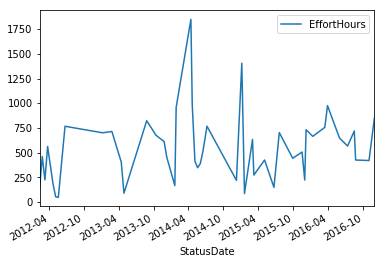

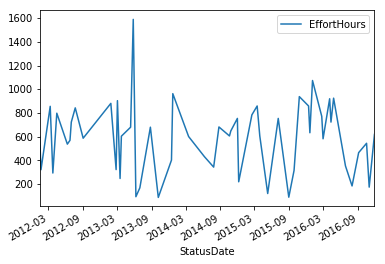

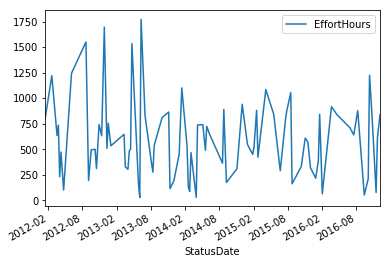

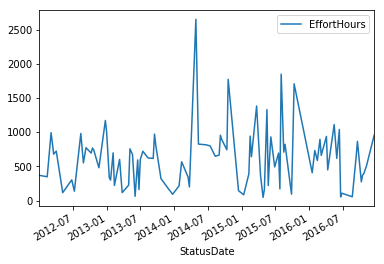

In [24]:
Daily.loc['0010'].plot()
Daily.loc['0026'].plot()
Daily.loc['A010'].plot()
Daily.loc['A210'].plot();

We can also just plot the data on a specific date, like ***2016***. We can now clearly see that the data for these MLIs is all over the place. Since the data consist of weekly effort hours, the variability of the data seems suspect. For this tutorial we will assume bad data and proceed.

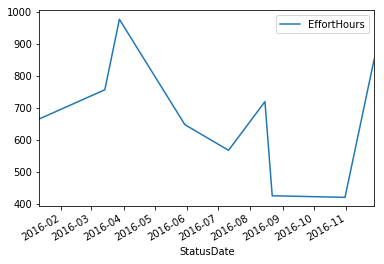

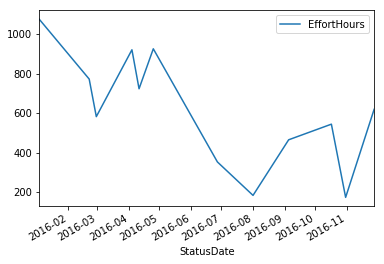

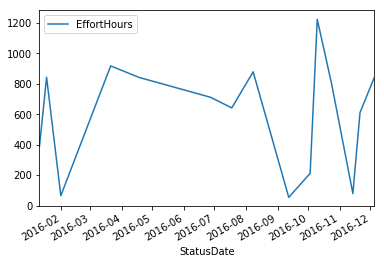

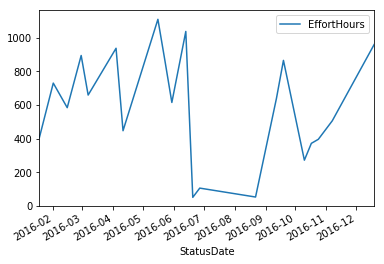

In [25]:
Daily.loc['0010']['2016':].plot()
Daily.loc['0026']['2016':].plot()
Daily.loc['A010']['2016':].plot()
Daily.loc['A210']['2016':].plot();

We will assume that per month the effort hours should remain relatively steady. Any data outside a specific range in that month will be removed from the data set. The final result should have smooth graphs with no spikes.

***MLIsYearMonth*** - Here we group by MLIs, Year of StatusDate, and Month of StatusDate.
***Daily['Outlier']*** - A boolean (True or False) value letting us know if the value in the EffortHours column is ouside the acceptable range.

We will be using the attribute ***transform*** instead of ***apply***. The reason is that transform will keep the shape(# of rows and columns) of the dataframe the same and apply will not. By looking at the previous graphs, we can realize they are not resembling a gaussian distribution, this means we cannot use summary statistics like the mean and stDev. We use percentiles instead. Note that we run the risk of eliminating good data.

In [26]:
# Calculate Outliers
MLIsYearMonth = Daily.groupby([Daily.index.get_level_values(0), Daily.index.get_level_values(1).year, Daily.index.get_level_values(1).month])
Daily['Lower'] = MLIsYearMonth['EffortHours'].transform( lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Upper'] = MLIsYearMonth['EffortHours'].transform( lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Outlier'] = (Daily['EffortHours'] < Daily['Lower']) | (Daily['EffortHours'] > Daily['Upper']) 

# Remove Outliers
Daily = Daily[Daily['Outlier'] == False]

The dataframe named ***Daily*** will hold effort hours that have been aggregated per day. The original data (df) has multiple records per day. We are left with a data set that is indexed by both the MLI and the StatusDate. The Outlier column should be equal to ***False*** signifying that the record is not an outlier.

In [27]:
Daily.head()

EffortHours    Lower    Upper  Outlier
MLIs StatusDate                                        
0010 2012-02-13          138 -132.875  731.875    False
     2012-02-27          461 -132.875  731.875    False
     2012-03-12          224  -99.250  885.250    False
     2012-03-26          562  -99.250  885.250    False
     2012-04-23          187   93.500  280.500    False

We create a separate dataframe named ***ALL*** which groups the Daily dataframe by StatusDate. We are essentially getting rid of the ***State*** column. The ***Max*** column represents the maximum customer count per month. The ***Max*** column is used to smooth out the graph.

In [28]:
# Combine all markets

# Get the max effort hours by Date
ALL = pd.DataFrame(Daily['EffortHours'].groupby(Daily.index.get_level_values(1)).sum())
ALL.columns = ['EffortHours'] # rename column

# Group by Year and Month
YearMonth = ALL.groupby([lambda x: x.year, lambda x: x.month])

# What is the max effort hours per Year and Month
ALL['Max'] = YearMonth['EffortHours'].transform(lambda x: x.max())
ALL.head()

,EffortHours,Max
StatusDate,,
2012-01-02,368,1408
2012-01-16,1408,1408
2012-01-23,321,1408
2012-02-13,485,1221
2012-02-20,1221,1221


As you can see from the ***ALL*** dataframe above, in the month of January 2009, the maximum customer count was 901. If we had used ***apply***, we would have got a dataframe with (Year and Month) as the index and just the *Max* column with the value of 901.

There is also an interest to gauge if the current effort hours were reaching certain goals the company had established. The task here is to visually show if the current effort hours are meeting the goals listed below. We will call the goals ***BHAG*** (Big Hairy Annual Goal).

* 12/31/2015 - 3,000 hours
* 12/31/2016 - 2,000 hours
* 12/31/2017 - 1,000 hours

We will be using the **date_range** function to create our dates.

***Definition***: date_range(start=None, end=None, periods=None, freq='D', tz=None, normalize=False, name=None, closed=None)
***Docstring***: Return a fixed frequency datetime index, with day (calendar) as the default frequency

By choosing the frequency to be A or annual we will be able to get the three target dates from above.

In [29]:
pd.date_range?

In [30]:
# Create the BHAG dataframe
data = [3000,2000,1000]
idx = pd.date_range(start='12/31/2015', end='12/31/2017', freq='A')
BHAG = pd.DataFrame(data, index=idx, columns=['BHAG'])
BHAG

,BHAG
2015-12-31,3000
2016-12-31,2000
2017-12-31,1000


Combining dataframes as we have learned in previous lesson is made simple using the ***concat*** function. Remember when we choose ***axis = 0*** we are appending row wise.

In [31]:
# Combine the BHAG and the ALL data set 
combined = pd.concat([ALL,BHAG], axis=0)
combined = combined.sort_index(axis=0)
combined.tail()

,BHAG,EffortHours,Max
2016-11-28,NaN,1470.0,1470.0
2016-12-05,NaN,841.0,960.0
2016-12-19,NaN,960.0,960.0
2016-12-31,2000.0,NaN,NaN
2017-12-31,1000.0,NaN,NaN


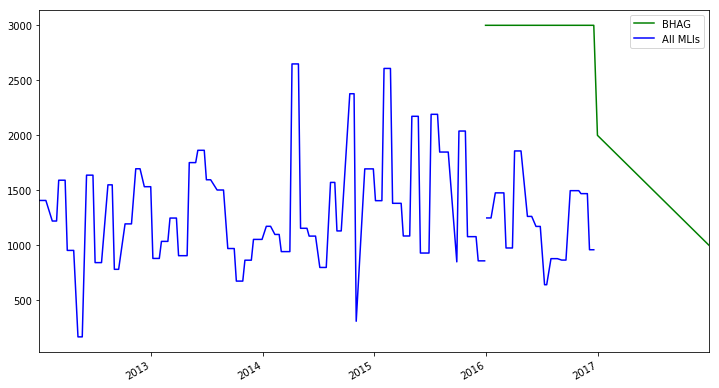

In [32]:
fig, axes = plt.subplots(figsize=(12, 7))

combined['BHAG'].fillna(method='pad').plot(color='green', label='BHAG')
combined['Max'].plot(color='blue', label='All MLIs')
plt.legend(loc='best');

There was also a need to forecast next year's customer count and we can do this in a couple of simple steps. We will first group the ***combined*** dataframe by ***Year*** and place the maximum effort hours for that year. This will give us one row per Year.

In [33]:
# Group by Year and then get the max value per year
Year = combined.groupby(lambda x: x.year).max()
Year

,BHAG,EffortHours,Max
2012,NaN,1696.0,1696.0
2013,NaN,1864.0,1864.0
2014,NaN,2649.0,2649.0
2015,3000.0,2608.0,2608.0
2016,2000.0,1858.0,1858.0
2017,1000.0,NaN,NaN


In [34]:
# Add a column representing the percent change per year
Year['YR_PCT_Change'] = Year['Max'].pct_change(periods=1)
Year

,BHAG,EffortHours,Max,YR_PCT_Change
2012,NaN,1696.0,1696.0,NaN
2013,NaN,1864.0,1864.0,0.099057
2014,NaN,2649.0,2649.0,0.421137
2015,3000.0,2608.0,2608.0,-0.015478
2016,2000.0,1858.0,1858.0,-0.287577
2017,1000.0,NaN,NaN,NaN


To get next year's end effort hours we will assume our current growth rate remains constant. We then will increase this years effort hours by that amount and that will be our forecast for next year.

In [35]:
(1 + Year.ix[2016,'YR_PCT_Change']) * Year.loc[2016,'Max']

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


1323.6825153374234

# Present Data

Create individual Graphs per MLI.

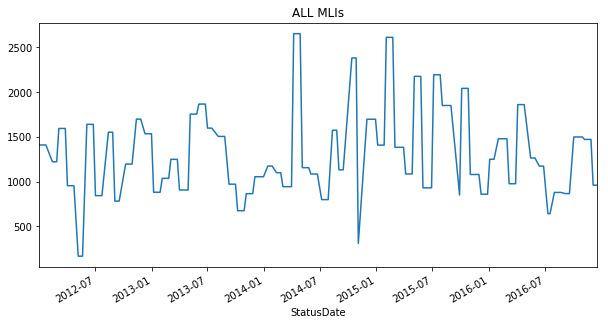

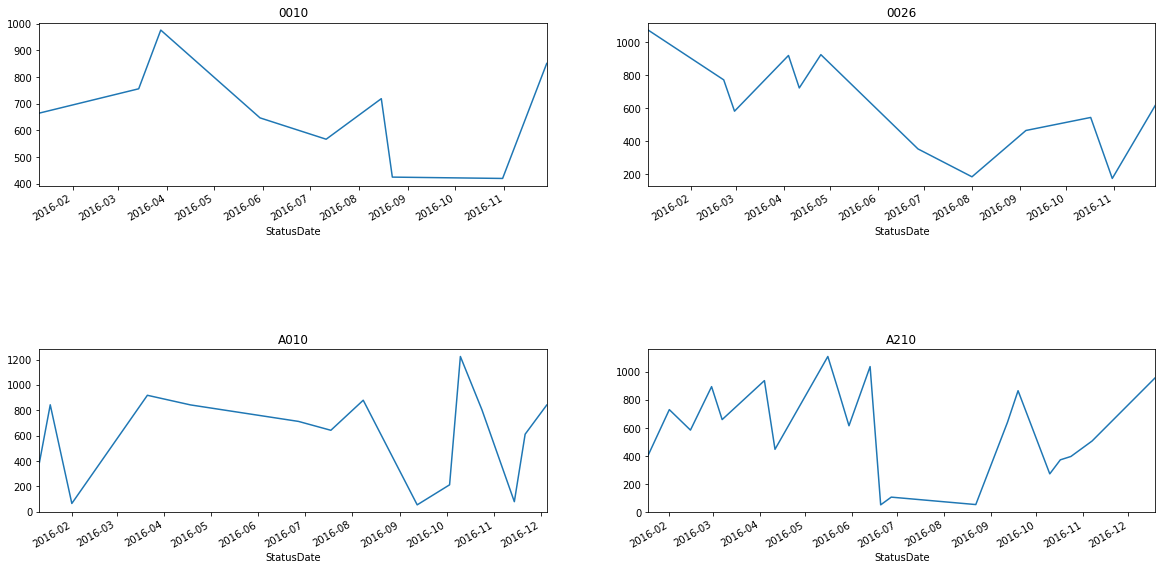

In [36]:
# First Graph
ALL['Max'].plot(figsize=(10, 5));plt.title('ALL MLIs')

# Last four Graphs
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.subplots_adjust(hspace=1.0) ## Create space between plots

Daily.loc['0010']['EffortHours']['2016':].fillna(method='pad').plot(ax=axes[0,0])
Daily.loc['0026']['EffortHours']['2016':].fillna(method='pad').plot(ax=axes[0,1]) 
Daily.loc['A010']['EffortHours']['2016':].fillna(method='pad').plot(ax=axes[1,0]) 
Daily.loc['A210']['EffortHours']['2016':].fillna(method='pad').plot(ax=axes[1,1]) 

# Add titles
axes[0,0].set_title('0010')
axes[0,1].set_title('0026')
axes[1,0].set_title('A010')
axes[1,1].set_title('A210');